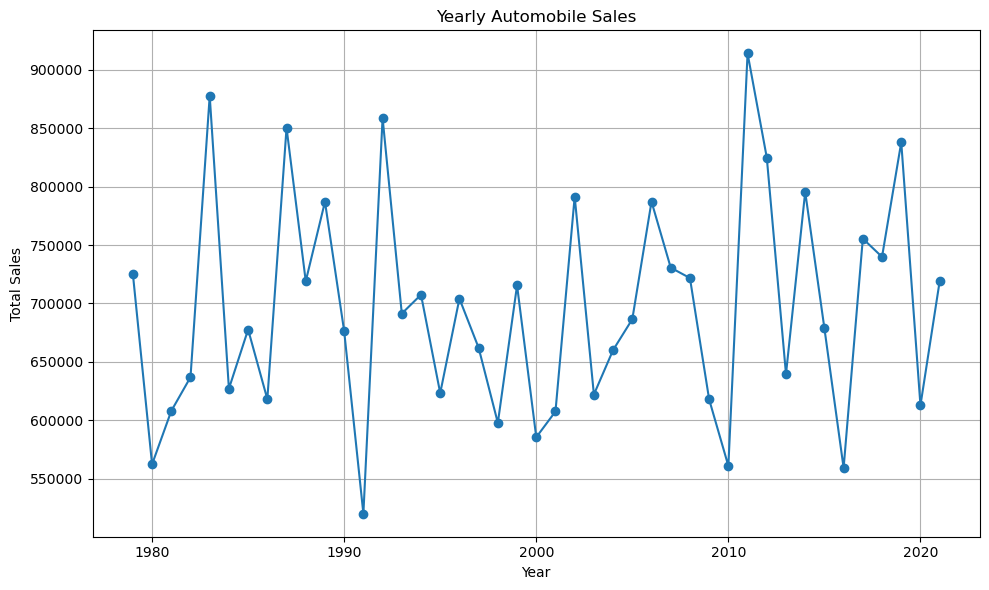

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSV and clean column names
df = pd.read_csv("sample_automobile.csv")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Step 2: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Extract year
df['Year'] = df['Date'].dt.year

# Step 4: Group by year and sum sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Step 5: Plot
yearly_sales.plot(kind='line', marker='o', title='Yearly Automobile Sales', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



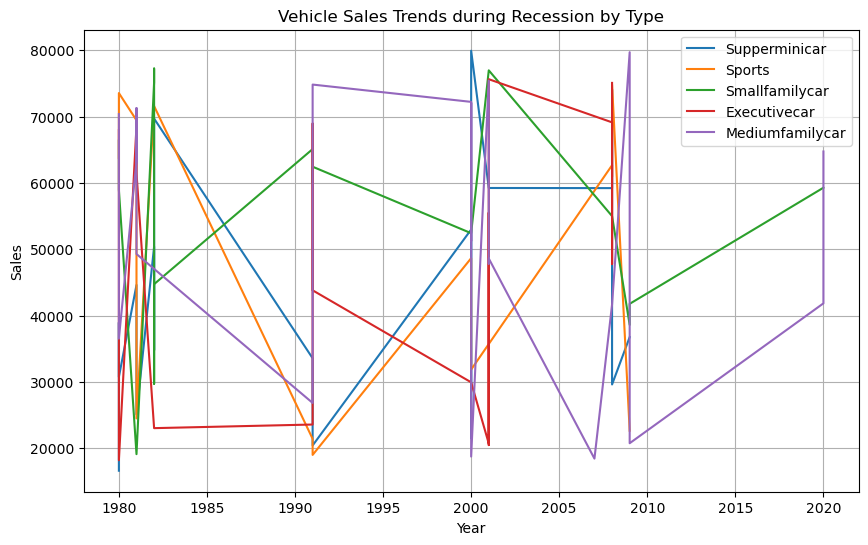

In [3]:
recession_data = df[df["Recession"] == 1]
plt.figure(figsize=(10,6))
for v_type in recession_data["Vehicle_Type"].unique():
    subset = recession_data[recession_data["Vehicle_Type"] == v_type]
    plt.plot(subset["Year"], subset["Automobile_Sales"], label=v_type)
plt.title("Vehicle Sales Trends during Recession by Type")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

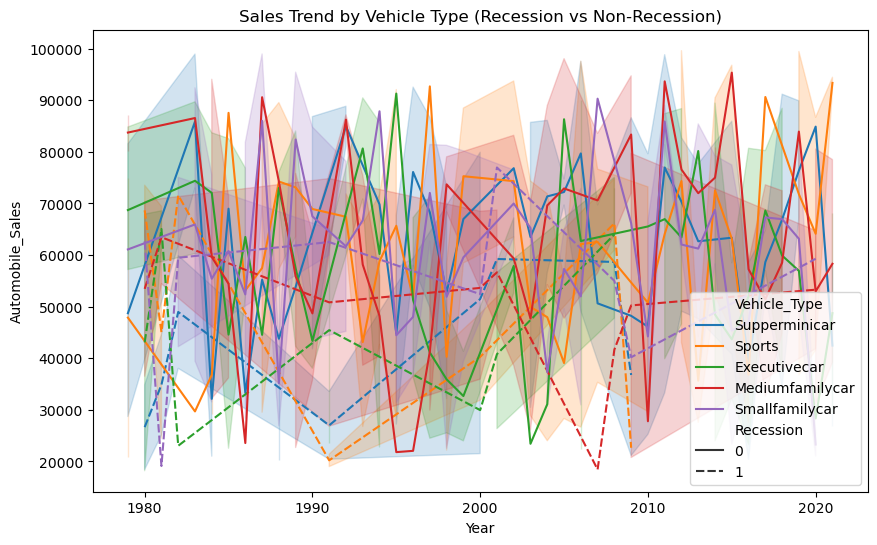

In [7]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="Automobile_Sales", hue="Vehicle_Type", style="Recession")
plt.title("Sales Trend by Vehicle Type (Recession vs Non-Recession)")
plt.show()

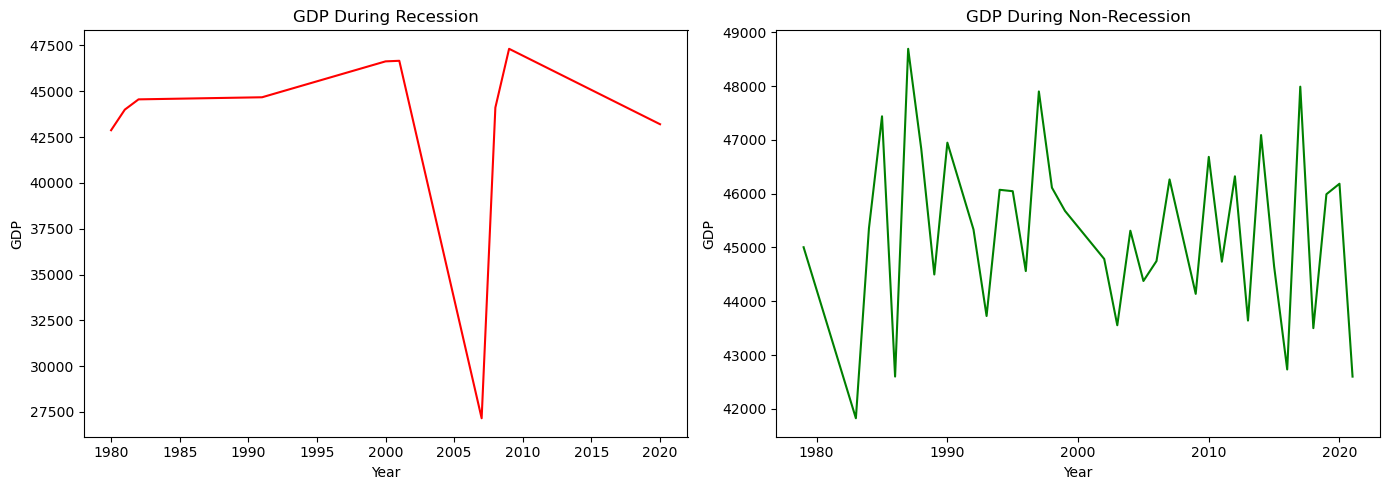

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df[df["Recession"] == 1].groupby("Year")["GDP"].mean().plot(ax=axes[0], title="GDP During Recession", color='r')
df[df["Recession"] == 0].groupby("Year")["GDP"].mean().plot(ax=axes[1], title="GDP During Non-Recession", color='g')
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("GDP")
plt.tight_layout()
plt.show()


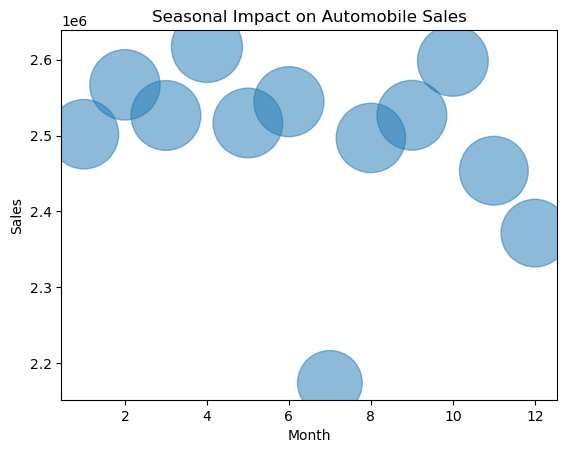

In [11]:
seasonality_data = df.groupby("Month")["Automobile_Sales"].sum().reset_index()
plt.scatter(seasonality_data["Month"], seasonality_data["Automobile_Sales"],
            s=seasonality_data["Automobile_Sales"] / 1000, alpha=0.5)
plt.title("Seasonal Impact on Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()




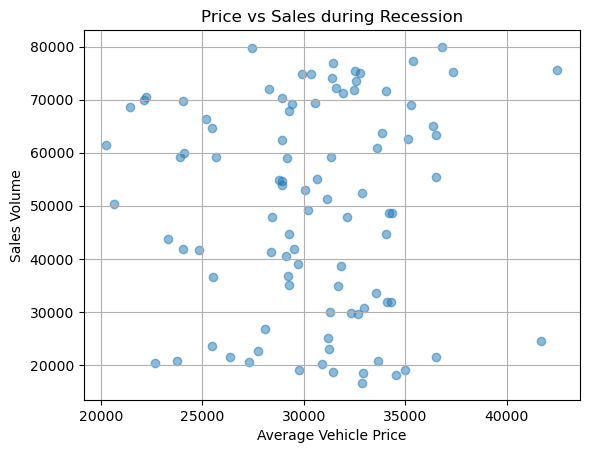

In [15]:
recession_data = df[df["Recession"] == 1]
plt.scatter(recession_data["Price"], recession_data["Automobile_Sales"], alpha=0.5)
plt.title("Price vs Sales during Recession")
plt.xlabel("Average Vehicle Price")
plt.ylabel("Sales Volume")
plt.grid(True)
plt.show()

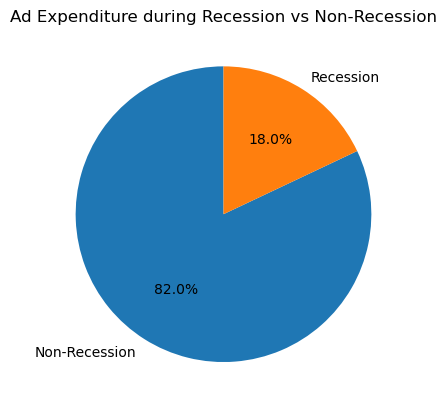

In [17]:
ad_exp = df.groupby("Recession")["Advertising_Expenditure"].sum()
labels = ["Non-Recession", "Recession"]
plt.pie(ad_exp, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Ad Expenditure during Recession vs Non-Recession")
plt.show()

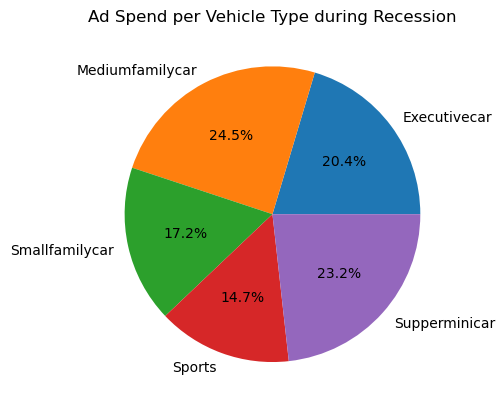

In [19]:
recession_ad = df[df["Recession"] == 1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
plt.pie(recession_ad, labels=recession_ad.index, autopct='%1.1f%%')
plt.title("Ad Spend per Vehicle Type during Recession")
plt.show()

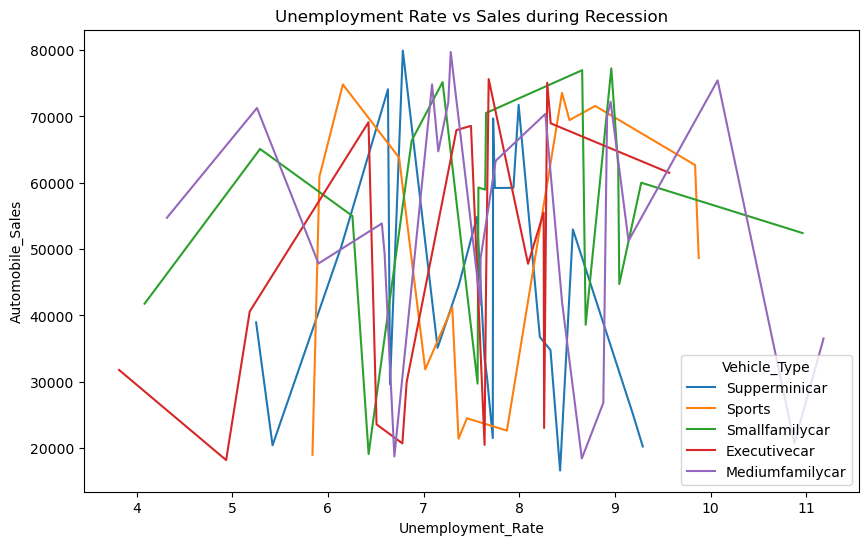

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(data=recession_data, x="Unemployment_Rate", y="Automobile_Sales", hue="Vehicle_Type")
plt.title("Unemployment Rate vs Sales during Recession")
plt.show()

In [25]:
pip install dash

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   --------------------- ------------------ 4.2/7.9 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------  7.9/7.9 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 19.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import dash
from dash import html, dcc
import plotly.express as px

app = dash.Dash(__name__)
app.title = "XYZAutomotives Dashboard"


In [31]:
dropdown = dcc.Dropdown(
    id='report-selector',
    options=[
        {'label': 'Recession Report', 'value': 'recession'},
        {'label': 'Yearly Report', 'value': 'yearly'},
    ],
    value='yearly'
)


In [45]:
html.Div(id='output-container', className='output-div')


Div(id='output-container', className='output-div')

In [43]:
from dash.dependencies import Input, Output
import dash
from dash import html, dcc, Input, Output
import plotly.express as px

# Prepare filtered data
recession_data = df[df["Recession"] == 1]

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "XYZAutomotives Dashboard"

# Layout
app.layout = html.Div([
    html.H1("XYZAutomotives Sales Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select Report Type:"),
        dcc.Dropdown(
            id='report-selector',
            options=[
                {'label': 'Recession Report', 'value': 'recession'},
                {'label': 'Yearly Report', 'value': 'yearly'}
            ],
            value='yearly',
            style={'width': '50%'}
        ),
    ], style={'padding': '20px'}),

    html.Div(id='output-container', className='output-div', style={'padding': '20px'})
])

# Callback for displaying graphs
@app.callback(
    Output('output-container', 'children'),
    Input('report-selector', 'value')
)
def update_output(report):
    if report == 'recession':
        # 1. Line Plot: Recession Sales by Vehicle Type
        fig1 = px.line(recession_data, x="Year", y="Automobile_Sales", color="Vehicle_Type",
                       title="Recession Period - Automobile Sales by Vehicle Type")

        # 2. Pie Chart: Advertising Expenditure by Vehicle Type
        ad_exp = recession_data.groupby("Vehicle_Type")["Advertising_Expenditure"].sum().reset_index()
        fig2 = px.pie(ad_exp, names="Vehicle_Type", values="Advertising_Expenditure",
                      title="Ad Expenditure by Vehicle Type (Recession)")

        # 3. Scatter Plot: Avg Price vs Sales
        fig3 = px.scatter(recession_data, x="Average_Price", y="Automobile_Sales", color="Vehicle_Type",
                          title="Average Price vs Sales during Recession", size="Automobile_Sales", opacity=0.6)

        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2),
            dcc.Graph(figure=fig3)
        ])

    else:
        # 1. Line Plot: Yearly Automobile Sales
        yearly_sales = df.groupby("Year")["Automobile_Sales"].sum().reset_index()
        fig1 = px.line(yearly_sales, x="Year", y="Automobile_Sales", title="Yearly Automobile Sales")

        # 2. Bar Chart: Unemployment Rate by Year
        unemployment = df.groupby("Year")["Unemployment_Rate"].mean().reset_index()
        fig2 = px.bar(unemployment, x="Year", y="Unemployment_Rate", title="Average Unemployment Rate per Year")

        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2)
        ])

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


 



